<a href="https://colab.research.google.com/github/Elwing-Chou/kmu/blob/main/0325_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Elwing-Chou/kmu

latex math

$ \frac{1}{2} \sum_{i=1}^n (x - \mu)^2 $

JSON格式: 

1. list型態(同類型): [60, 30, 20]
2. dict型態(聚集表示複雜型態): {"姓名":"Elwing", "身高":175}

key-value
1. list: key1(0, 1, 2) key2(-3, -2, -1)
2. dict: key自定義(數字/字串/tuple)

key-value最重要的操作(查詢): 要查的東西[key]

list[0]/dict["姓名"]

In [1]:
import json
import pandas as pd
import urllib.request as req

url = "https://www.google.com/doodles/json/2022/11?hl=zh-TW"
response = req.urlopen(url)
# response->檔案型態(支援.read())
# json.load(檔案) -> list/dict型態
data_json = json.load(response)
# pd.DataFrame(表格型態)
data_table = pd.json_normalize(data_json)
# 如果你要存檔
data_table.to_csv("doodle.csv", encoding="utf-8")

1. 每一個商品存成一個JSON檔案

In [2]:
# open -> read -> close 會出現close沒有做到的問題
# with ... as 保證會 close
import os
base = "google"
if not os.path.exists(base):
    os.makedirs(base)

with open("2022_11.json", "w", encoding="utf-8") as f:
    json.dump(data_json, 
         f,
         ensure_ascii=False,
         indent=4)
# 我最常做: 把每個資料當成一個json
for pic in data_json:
    imgurl = "https:" + pic["high_res_url"]
    fn = imgurl.split("/")[-1]
    fp = os.path.join(base, fn)
    # 下載圖片
    req.urlretrieve(imgurl, fp)
    fn = fn.split(".")[0] + ".json"
    fp = os.path.join(base, fn)
    with open(fp, "w", encoding="utf-8") as f:
        json.dump(pic,
             f,
             ensure_ascii=False,
             indent=4)

還原成json

In [4]:
import glob
pics = []
for fp in glob.glob("google/*.json"):
    with open(fp, "r", encoding="utf-8") as f:
        p = json.load(f)
        pics.append(p)
pics

[{'name': 'celebrating-enrique-de-la-mora',
  'title': '紀念恩里克德拉莫拉',
  'url': '//www.google.com/logos/doodles/2022/celebrating-enrique-de-la-mora-6753651837109441-l.png',
  'alternate_url': 'https://lh3.googleusercontent.com/gK5J5qqCj33uzji7scF6SV_RMA55p56n_mTI2Z77JylTXhvGO-U9_LSuUKi8jWfkwAj9r2n-gXwAvX0ebFVrU3uPqEfbOPcUEBPISlaYKIlyzOJS6C6L',
  'high_res_url': '//www.google.com/logos/doodles/2022/celebrating-enrique-de-la-mora-6753651837109441-2x.png',
  'high_res_width': 1000,
  'high_res_height': 400,
  'run_date_array': [2022, 11, 19],
  'translations': {'en': {'query': 'Enrique de la Mora',
    'hover_text': 'Celebrating Enrique de la Mora',
    'share_text': 'Celebrating Enrique de la Mora! #GoogleDoodle'},
   'es-419': {'query': 'Enrique de la Mora',
    'hover_text': '115º aniversario del nacimiento de Enrique de la Mora',
    'share_text': '115º aniversario del nacimiento de Enrique de la Mora #GoogleDoodle'},
   'es': {'query': 'Enrique de la Mora',
    'hover_text': 'Homenaje a

抓到巴哈姆特動畫瘋的程式碼, 但她索ip, 所以你一定要用本地才能跑

```python
# import json
# import requests
# url = "https://ani.gamer.com.tw/ajax/danmuGet.php"
# datas = {"sn": "23505"}
# h = {
#     "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"
# }
# response = requests.post(url, datas, headers=h)
# result = json.loads(response.text)
# with open("danmu.txt", "w", encoding="utf-8") as f:
#     json.dump(result, f, ensure_ascii=False, indent=4)
```

In [ ]:
url = "https://github.com/Elwing-Chou/kmu/raw/main/danmu.txt"
req.urlretrieve(url, "danmu.txt")
df = pd.read_json("danmu.txt", encoding="utf-8")
df

In [ ]:
# pandas兩種型態: a. DataFrame  b. Series
df["userid"].value_counts()

In [ ]:
# 我要把每一個使用者的彈幕取前兩條
df.groupby("userid").head(2)

pandas最重要的兩個操作 1. 篩選 2. 轉換

In [20]:
# 篩選 DataFrame[跟你資樹比數依樣多True/False]
fil = df["color"] == "#FFFFFF"
df[fil]

,text,color,size,position,time,sn,userid
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
5,是錢讓我們在此相遇,#FFFFFF,1,0,6,23600019,nana013001
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


In [ ]:
# 轉換操作: 定義一個轉換(函式) -> Series.apply(函式名稱)
# def test(a, b):
#     c = a + b
#     return c
# 型態/操作
# list[0]
# test:步驟SOP型態 ():真的執行
# test(3, 4)
# a = test
# a(3, 4)
import jieba
import jieba.analyse
url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
req.urlretrieve(url, "bigdic")
jieba.set_dictionary("bigdic")
def change(s):
    return " ".join(jieba.cut(s))
# change("我喜歡你")
result = df["text"].apply(change)
result

In [37]:
total = "\n".join(result)
keywords = jieba.analyse.extract_tags(total, withWeight=True, allowPOS=["n"])
keywords

[('大哥', 2.1847287421275228),
 ('炭治郎', 0.20938291706497078),
 ('炎柱', 0.15952984157331107),
 ('好帥', 0.1395886113766472),
 ('正片', 0.13326615230483738),
 ('豆子', 0.09501876635239365),
 ('太太', 0.06831407293421184),
 ('晚安', 0.06574757485971643),
 ('男人', 0.06439994196761467),
 ('肚子', 0.059876997090825695),
 ('變鬼', 0.05982369058999165),
 ('妹妹', 0.05860282866155129),
 ('之刃', 0.05796779671392828),
 ('眼睛', 0.05566103452758965),
 ('首刷', 0.04985307549165971),
 ('玩火', 0.04836569040450375),
 ('乘客', 0.0465992381850709),
 ('抗性', 0.04326237334195162),
 ('鬼片', 0.03988246039332777),
 ('頭柱', 0.03988246039332777)]

1. 靜態視覺化: matplotlib(基礎) -> seaborn(進階)
2. 動態視覺化: plotly altair

countplot: 數數對象是類別型

barplot: 不數數, 我自己給直

histogram(histplot): 數對象是連續型(0-10歲有幾個)

scatterplot: x, y是連續型

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !開始都是 linux指令
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager 

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

<Axes: xlabel='key', ylabel='tfidf'>

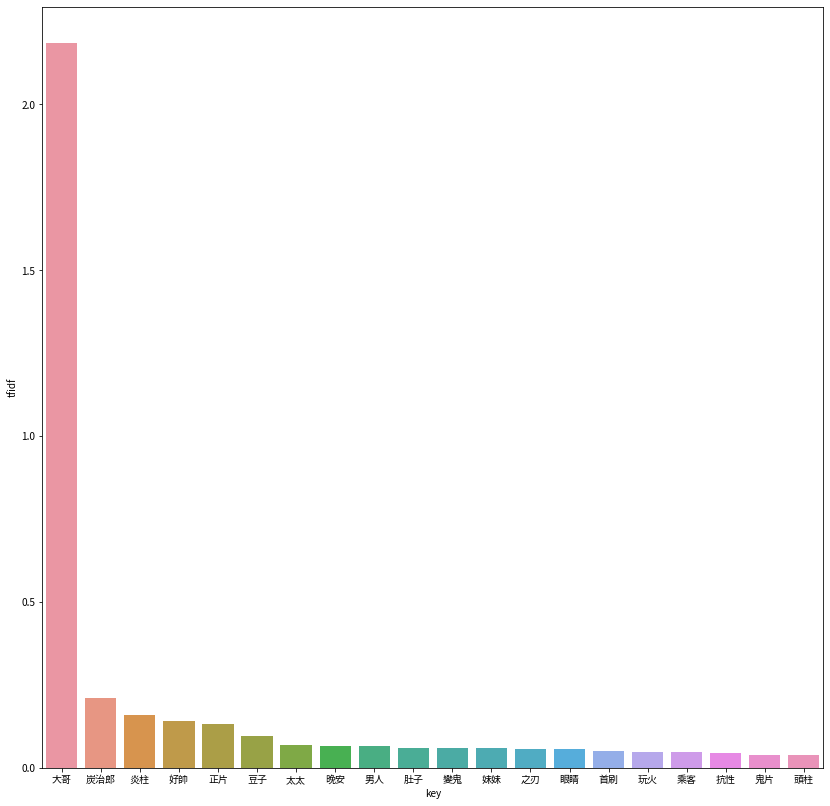

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 14))
# 第一種: x, y都是一個list
xs = [k for k, v in keywords]
ys = [v for k, v in keywords]
# [n ** 2 for n in [0, 1, 2]]
# sns.barplot(x=xs, y=ys)
# 第二種: df
keydf = pd.DataFrame(keywords, columns=["key", "tfidf"])
sns.barplot(data=keydf, x="key", y="tfidf")

In [58]:
import altair as alt

# histogram
# mark_bar: 棒狀 mark_point: 點
chart = alt.Chart(df).mark_bar().encode(x=alt.X("time", bin=alt.BinParams(step=500)), y="count()")
chart.interactive()

alt.Chart(...)

In [ ]:
from sklearn.manifold import TSNE
from tensorflow.keras.datasets.mnist import load_data
# mnist資料及是一個28 * 28的灰階圖片
# 0:黑 255:白
# x_test, y_test: 10000份圖片和她的答案
(x_train, y_train), (x_test, y_test) = load_data()

# 因為altair只能畫最多5000筆資料, 所以我各篩選了200筆
s = pd.DataFrame(y_test)
# 每一種東西拿到前200筆, 接著拿出她原本的index
idx = s.groupby(by=0).head(200).index
# 回到原本的位置把他們篩選出來
xs, ys = x_test[idx], y_test[idx]
plt.imshow(xs[0], cmap="gray")
# 把本來(2000, 28, 28)做一個reshape(2000, 784)
xs = xs.reshape(2000, 784)
print(xs.shape)
print(ys.shape)

降維

784 -> 2

SNE: 高維分布=低維分布

擁擠效應: 

tSNE: student-T -> 近的更近, 遠得更遠

In [63]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(xs)

<Axes: >

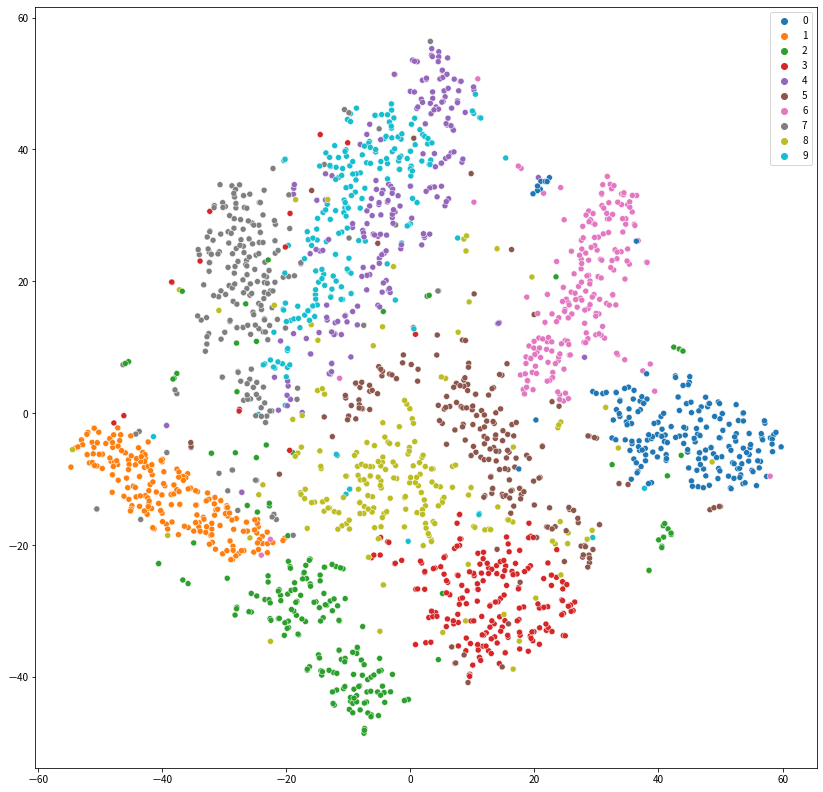

In [64]:
# 靜態圖
ax1, ax2 = x_tsne[:, 0], x_tsne[:, 1]
plt.figure(figsize=(14, 14))
sns.scatterplot(x=ax1, y=ax2, hue=ys, palette=sns.color_palette("tab10", 10))

In [67]:
# load an example dataset
sample = pd.DataFrame({
    "ax1":ax1,
    "ax2":ax2,
    "ans":ys
})

interval = alt.selection_interval()

points = alt.Chart(sample).mark_point().encode(
  x='ax1',
  y='ax2',
  color=alt.condition(interval, 'ans:N', alt.value('lightgray'))
).properties(
  selection=interval
).interactive()

bar = alt.Chart(sample).mark_bar().encode(
  x='count()',
  y='ans:N',
  color='ans:N'
).transform_filter(interval).interactive()

points & bar

alt.VConcatChart(...)